<a href="https://colab.research.google.com/github/michpv90/Googleable/blob/main/Muffin_Chihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir archive

! unzip archive.zip -d archive

In [3]:
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
#Set batch size and image size
batch_size = 20
img_height = 256
img_width = 256

In [54]:
#load images from a directory of images on disk to a tf.data.Dataset
train_ds = tf.keras.utils.image_dataset_from_directory('train',
                        validation_split = 0.2,
                        subset = 'training',
                        seed = 8,
                        image_size = (img_height, img_width),
                        batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory('train',
                        validation_split = 0.2,
                        subset = 'validation',
                        seed = 8,
                        image_size = (img_height, img_width),
                        batch_size = batch_size)

#test_ds = tf.keras.utils.image_dataset_from_directory('test',
                        #image_size = (img_height, img_width),
                        #batch_size = batch_size)

Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Found 4733 files belonging to 2 classes.
Using 946 files for validation.


In [30]:
#Display Class Names
class_names = train_ds.class_names
class_names

['chihuahua', 'muffin']

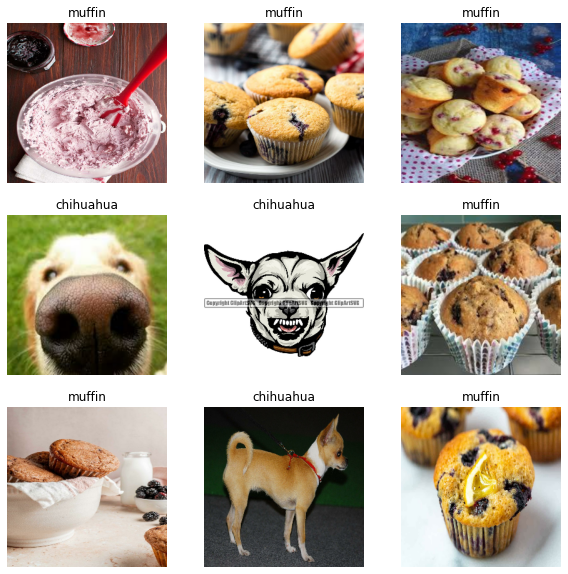

In [31]:
#Visualize data
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [32]:
#Display the dimension of the image batch
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 256, 256, 3)
(20,)


In [55]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation = Sequential()
data_augmentation.add(layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)))
data_augmentation.add( layers.RandomZoom(0.1))
data_augmentation.add(layers.RandomRotation(0.1))


In [56]:
#initialize model
model = Sequential()

In [57]:
num_classes = len(class_names)

model.add(data_augmentation)
model.add(Rescaling(1./255, input_shape = (img_height, img_width,3)))
model.add(Conv2D(16, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation = 'relu'))
#model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dense(num_classes))

In [58]:
model.compile(optimizer = 'SGD',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [60]:
epochs = 20

history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epochs)

Epoch 1/20
190/190 [==============================] - 26s 64ms/step - loss: 3.0870 - accuracy: 0.6551 - val_loss: 2.8597 - val_accuracy: 0.7896
Epoch 2/20
190/190 [==============================] - 10s 50ms/step - loss: 2.8008 - accuracy: 0.7626 - val_loss: 2.6313 - val_accuracy: 0.8108
Epoch 3/20
190/190 [==============================] - 9s 47ms/step - loss: 2.5991 - accuracy: 0.7798 - val_loss: 2.4480 - val_accuracy: 0.8192
Epoch 4/20
190/190 [==============================] - 9s 48ms/step - loss: 2.4117 - accuracy: 0.8035 - val_loss: 2.2890 - val_accuracy: 0.8319
Epoch 5/20
190/190 [==============================] - 9s 47ms/step - loss: 2.2340 - accuracy: 0.8178 - val_loss: 2.1385 - val_accuracy: 0.8404
Epoch 6/20
190/190 [==============================] - 9s 48ms/step - loss: 2.0903 - accuracy: 0.8239 - val_loss: 2.0180 - val_accuracy: 0.8288
Epoch 7/20
190/190 [==============================] - 9s 48ms/step - loss: 1.9591 - accuracy: 0.8344 - val_loss: 1.8828 - val_accuracy: 0.85

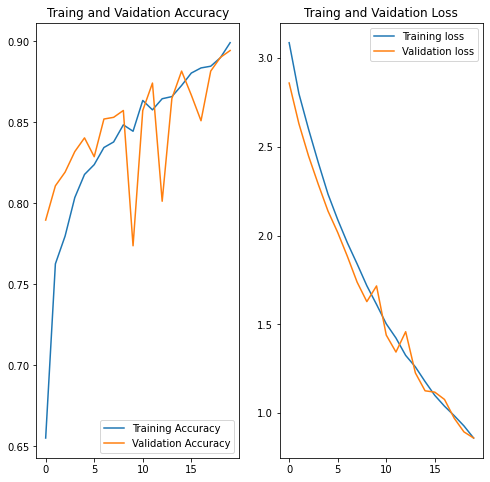

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Vaidation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc='upper right')
plt.title('Traing and Vaidation Loss')
plt.show()

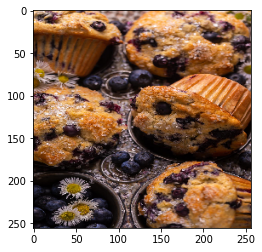

In [72]:
#Path to image 
path = '/content/test/muffin/img_2_346.jpg'

#Loads an image into PIL format
img = tf.keras.utils.load_img(path,target_size=(img_height, img_width))
#convert PIL image to an array
img_array = tf.keras.utils.img_to_array(img)
#Returns a tensor with a length 1 axis inserted at index axis
img_array = tf.expand_dims(img_array, 0) # Create a batch

#display image
plt.imshow(img)



In [73]:
#Prediction
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to muffin with a 98.27 percent confidence.


In [64]:
model.save('my_model.h5')